# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Project information
## Data set regions and data description: US and Ann Arbor, MI

1) USA 2010 Religion data for each metropolitan area (including Ann Arbor area)

2) USA 2010 FBI crime data for each metropolitan area (including Ann Arbor area)

## Question statement
1) Based on the number of religion adherents, did the religion help to reduce the crime, statistically?

2) How did Ann Arbor, MI compared to the rest of the US in terms of religions adherents and crime/murder cases?
## Link to the data sets
1) 2010 Religion data
    - http://www.thearda.com/Archive/Files/Downloads/RCMSMT10_DL2.asp
    - Data dictionary
    - http://www.thearda.com/Archive/Files/Codebooks/RCMSMT10_CB.asp
2) 2010 FBI crime data
    - https://ucr.fbi.gov/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/tables/table-6

### Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import seaborn as sns

In [2]:
#cleaning religion data
df1 = pd.read_excel(r".\ProjData\U.S. Religion Census.XLSX")
df1 = df1.loc[:,['MTNAME','TOTADH','POP2010']]
df1 = df1.dropna(axis = 0)
df1['ADH per capita'] = df1['TOTADH'] / df1['POP2010']
df1 = df1.set_index('MTNAME')
df1['Metro name'] = df1.apply(lambda x: x.name[0:-30], axis = 1)
df1 = df1.set_index('Metro name')
df1 = df1[['ADH per capita']]

In [3]:
#cleaning 2010 FBI data
df2 = pd.read_excel(r".\ProjData\table-6.xls", skiprows = 
                    [0, 1, 2, 2224, 2225, 2226, 2227, 2228, 2229])
df2['Metropolitan Statistical Area']  = df2['Metropolitan Statistical Area'].ffill()
df2 = df2.loc[:,['Metropolitan Statistical Area','Population','Violent crime','Property crime',
                'Murder and nonnegligent manslaughter']]
df2[df2[:] == ' '] = np.nan
df2['Total crime'] = df2.apply(lambda x: np.nansum([x['Violent crime'],x['Property crime']]), axis = 1)

df2_g = df2.groupby(['Metropolitan Statistical Area']).ffill()
df2_g = df2_g.groupby(['Metropolitan Statistical Area']).bfill()
df2_g = df2_g.groupby(['Metropolitan Statistical Area']).max()
df2_g = df2_g.drop(df2_g.index[0],axis = 0)
df2_g = df2_g.rename(columns={df2_g.columns[3]:'Murder'})
df2_g['Murder per capita'] = df2_g['Murder'] / df2_g['Population']
df2_g['Crime per capita'] =  df2_g['Total crime'] / df2_g['Population']

#
# Nashville-Davidson has '       ' as value
# (error in the data source file, the cell was not completely merged)
# Nevertheless, that row can be dropped without affecting the result
# 
# get just the total crime and population

df2_g['Metro name'] = df2_g.apply(lambda x: x.name[0:-7], axis = 1)
df2_g = df2_g.set_index('Metro name')
df2_g = df2_g[['Murder per capita','Crime per capita']]

### Data Preparation: get x, y axes

In [4]:
dfm = pd.merge(df1, df2_g, how='inner', left_index=True, right_index=True)

x_ADH = dfm['ADH per capita'].values
y_Crime = dfm['Crime per capita'].values

dfm_mur = dfm.drop((dfm[dfm['Murder per capita'] == 0]).index,axis = 0)
x_ADH_mur = dfm_mur['ADH per capita'].values
y_Murder = dfm_mur['Murder per capita'].values

x_Mur_min = x_ADH_mur.min()
x_Mur_max = x_ADH_mur.max()

y_Mur_min = y_Murder.min()
y_Mur_max = y_Murder.max()

In [5]:
x_ann = dfm.loc['Ann Arbor, MI', 'ADH per capita']
y_c_ann = dfm.loc['Ann Arbor, MI', 'Crime per capita']
y_m_ann = dfm.loc['Ann Arbor, MI', 'Murder per capita']

### Plotting Results

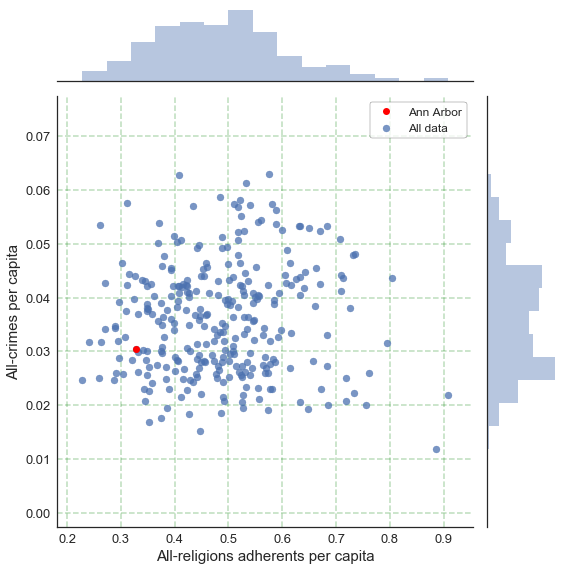

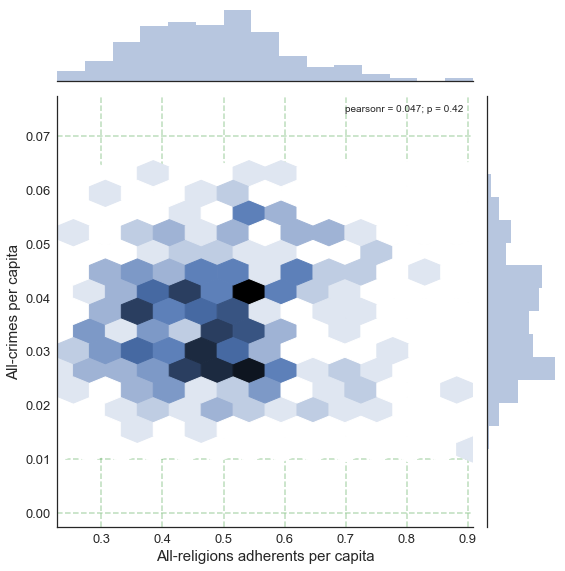

In [6]:
sns.set_style('white')


x1_str = 'All-religions adherents per capita'
y1_str = 'All-crimes per capita'


ax1 = (sns.jointplot(x_ADH, y_Crime, kind = 'scatter', alpha = 0.75, zorder = 1, label='All data')
        .set_axis_labels(x1_str, y1_str, size = 15))
# plt.scatter(x_ann,y_c_ann, color = 'r',zorder = 3)

ymin1, ymax1 = plt.ylim()
xmin1, xmax1 = plt.xlim()

plt.yticks(size = 16)

fig = plt.gcf()
fig.set_size_inches(8,8)

ax_total = fig.get_axes()
plt.axes(ax_total[0])
plt.yticks(size = 13)
plt.xticks(size = 13)
ax = plt.gca()
ax.xaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
ax.yaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
plt.subplots_adjust(left = 0.1)
ax1.ax_joint.plot([x_ann],[y_c_ann],'ro', label='Ann Arbor')
plt.legend(prop={'size':12}, frameon = True, facecolor ='w', edgecolor = 'k')
plt.savefig("2010_s_all_crime.png")

#plot hex graph
ax1 = sns.jointplot(x_ADH, y_Crime, kind = 'hex').set_axis_labels(x1_str, y1_str, size = 15)
plt.ylim(ymin1, ymax1)
plt.xlim(xmin1, xmax1)


plt.yticks(size = 16)

fig = plt.gcf()
fig.set_size_inches(8,8)


ax_total = fig.get_axes()
plt.axes(ax_total[0])
plt.yticks(size = 13)
plt.xticks(size = 13)
ax = plt.gca()
ax.xaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
ax.yaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
plt.subplots_adjust(left = 0.1)
plt.savefig("2010_h_all_crime.png")
plt.show()

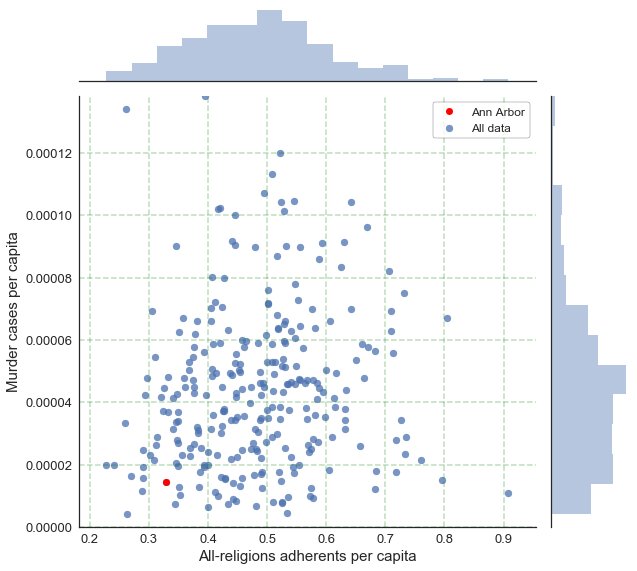

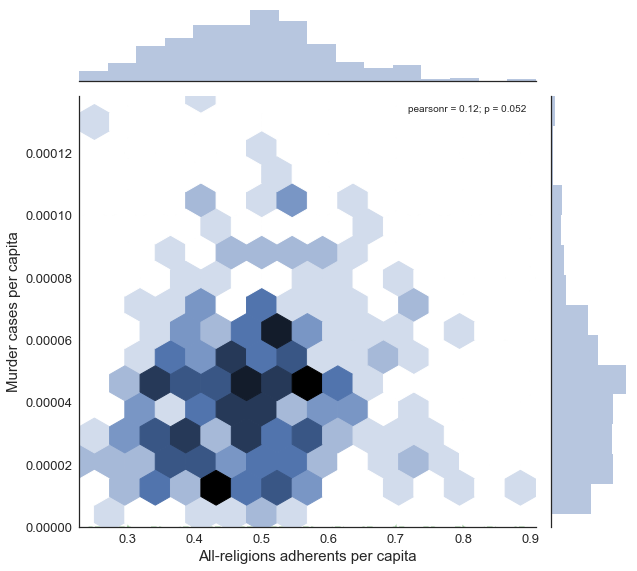

In [7]:
y1_str = 'Murder cases per capita'

ax1 = (sns.jointplot(x_ADH_mur, y_Murder, kind = 'scatter', alpha = 0.75, zorder = 0, label='All data')
        .set_axis_labels(x1_str, y1_str, size = 15))

ax1.ax_joint.plot([x_ann],[y_m_ann],'ro',zorder = 3, label='Ann Arbor')

plt.ylim(0, y_Mur_max)
ymin1, ymax1 = plt.ylim()
xmin1, xmax1 = plt.xlim()

plt.yticks(size = 16)

fig = plt.gcf()
fig.set_size_inches(9,8)

ax_total = fig.get_axes()
plt.axes(ax_total[0])
plt.yticks(size = 13)
plt.xticks(size = 13)
ax = plt.gca()
ax.xaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
ax.yaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
plt.subplots_adjust(left = 0.12)
plt.legend(prop={'size':12}, frameon = True, facecolor ='w', edgecolor = 'k')
plt.savefig("2010_s_murder.png")

#plot hex graph
ax1 = sns.jointplot(x_ADH_mur, y_Murder, kind = 'hex').set_axis_labels(x1_str, y1_str, size = 15)

plt.ylim(0, y_Mur_max)
plt.xlim(xmin1, xmax1)


plt.yticks(size = 16)

fig = plt.gcf()
fig.set_size_inches(9,8)

ax_total = fig.get_axes()
plt.axes(ax_total[0])
plt.yticks(size = 13)
plt.xticks(size = 13)
ax = plt.gca()
ax.xaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
ax.yaxis.grid(color='g', linestyle='--', linewidth=0.4, zorder = 0)
plt.subplots_adjust(left = 0.12)
plt.savefig("2010_h_murder.png")

plt.show()

## Discussion based on the research question

The visualization on the relationships between crime rate and number of religion adherents are shown here. The data were obtained from FBI data and religion census. Both data sets are for the year of 2010. 1) the total numbers of crime and 2) the total number of murder cases per population of each metropolitan area were calculated and used in the comparison. The first figure shows the scatter plot of all-religions adherents per capita versus all crime cases. It can be seen that the scatter plot itself does not show a clear relationship between these two parameters. Therefore, the number of people who have a certain religion does not directly correlate to the number of crime or murder case that a certain city will face. Ann Arbor MI, in particular has the number of religions adherents per capita of 0.328 (below average) and have murder and crime per capita of 0.000014 (below average) and 0.0305 (about the average), respectively. Ann Arbor can be considered as a low religions adherent city with below average murder cases and about average in terms of overall crime cases.

Therefore, the number of people who have a certain religion does not correlate to the amount of crime. It should be noted that the histogram above x-axis, is just about how the religions data are distributed regardless of crime/murder cases. In most cities, less than 70% of people have religion. This analysis shows that the quantity of religion adherents did not (in 2010) help to reduce the crime or murder cases. It was not correlated with the crime/murder cases. This is somewhat contradict to the belief that as more people have religion, people will be better and the crime should reduce. Yet, this does not necessarily counter intuitive, because the quantity does not tell the quality or how religious of a person is. Based on the obtained census data, when one person stated that s/he is a religion adherent, it does not mean that s/he won't commit a crime.

### Discussion based on Cairo's principle
#### Truthfulness, beauty, functionality, and insightfulness

My design choice for my visual in regards to truthfulness is to use seaborn joint point. This plot give the true value of data and the histogram of each axis. The color of Ann Arbor is designated to be red. This information is described in the legend part. The data were cleaned completely and it was adjusted to be in the form of value per the number of population. This is to allow a fair comparison between the city with small and large population.

In regard to Cairo's principle of beauty, I minimize the non-data-ink, and enlarge the font size of the axis label and ticks label so that it is legible for the reader. The hex plots were also provided so that they can beautifully give the information on the density of the data. Red color for Ann Arbor was used so that it was clear on the location of the Ann Arbor data.

In regard to Cairo's principle of functionality, my visualization give the full functionality to the reader to understand the relationship between the number of religion adherents and the number of crime and murder cases per capita. The histogram allow the reader to see the comparison between Ann Arbor and the rest of US clearly.

In regard to Cairo's principle of insightfulness, my visualization tell the answer to the important research question. This answer tell whether the number of religion adherent can help to reduce the crime or not. Intuitively, the number of people who has religions should commit less crime compared to people who are not abide by a certain religious belief. Nevertheless, my graph show that the quantity or number of people who have religion alone does not help to reduce the crime. The data suggests that the concentration degree of a person who is abide by religion's rule should also be considered. Therefore, this visualization help to not casually conclude that the number of religion adherent can indicate the decrease in crime or murder cases.

## Appendix: Intermediate data values

In [8]:
dfm

,ADH per capita,Murder per capita,Crime per capita
Metro name,,,
"Abilene, TX",0.632222,0.000031,0.040403
"Akron, OH",0.425786,0.000037,0.034903
"Albany, GA",0.516782,0.000087,0.050786
"Albany-Schenectady-Troy, NY",0.428175,0.000015,0.030041
"Albuquerque, NM",0.460034,0.000058,0.045666
"Alexandria, LA",0.670879,0.000058,0.052308
"Allentown-Bethlehem-Easton, PA-NJ",0.500896,0.000035,0.025262
"Altoona, PA",0.524302,0.000008,0.020552
"Amarillo, TX",0.682457,0.000057,0.053257


In [9]:
dfm_mur

,ADH per capita,Murder per capita,Crime per capita
Metro name,,,
"Abilene, TX",0.632222,0.000031,0.040403
"Akron, OH",0.425786,0.000037,0.034903
"Albany, GA",0.516782,0.000087,0.050786
"Albany-Schenectady-Troy, NY",0.428175,0.000015,0.030041
"Albuquerque, NM",0.460034,0.000058,0.045666
"Alexandria, LA",0.670879,0.000058,0.052308
"Allentown-Bethlehem-Easton, PA-NJ",0.500896,0.000035,0.025262
"Altoona, PA",0.524302,0.000008,0.020552
"Amarillo, TX",0.682457,0.000057,0.053257
